# 📚 Campus Recruitment Prediction 📚

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv("Placement_Data_Full_Class.csv")

## Basic Checks

In [3]:
# First five rows
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Last five rows
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
# Shape of data
data.shape

(215, 15)

* Dataset contains 15 columns with 215 observations.

In [6]:
# Columns in data
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
# Statistics of data
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
# Statistics of data for categorical value
data.describe(include='O')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [10]:
# Check duplicate
data.duplicated().sum()

0

## Exploratory Data Analysis

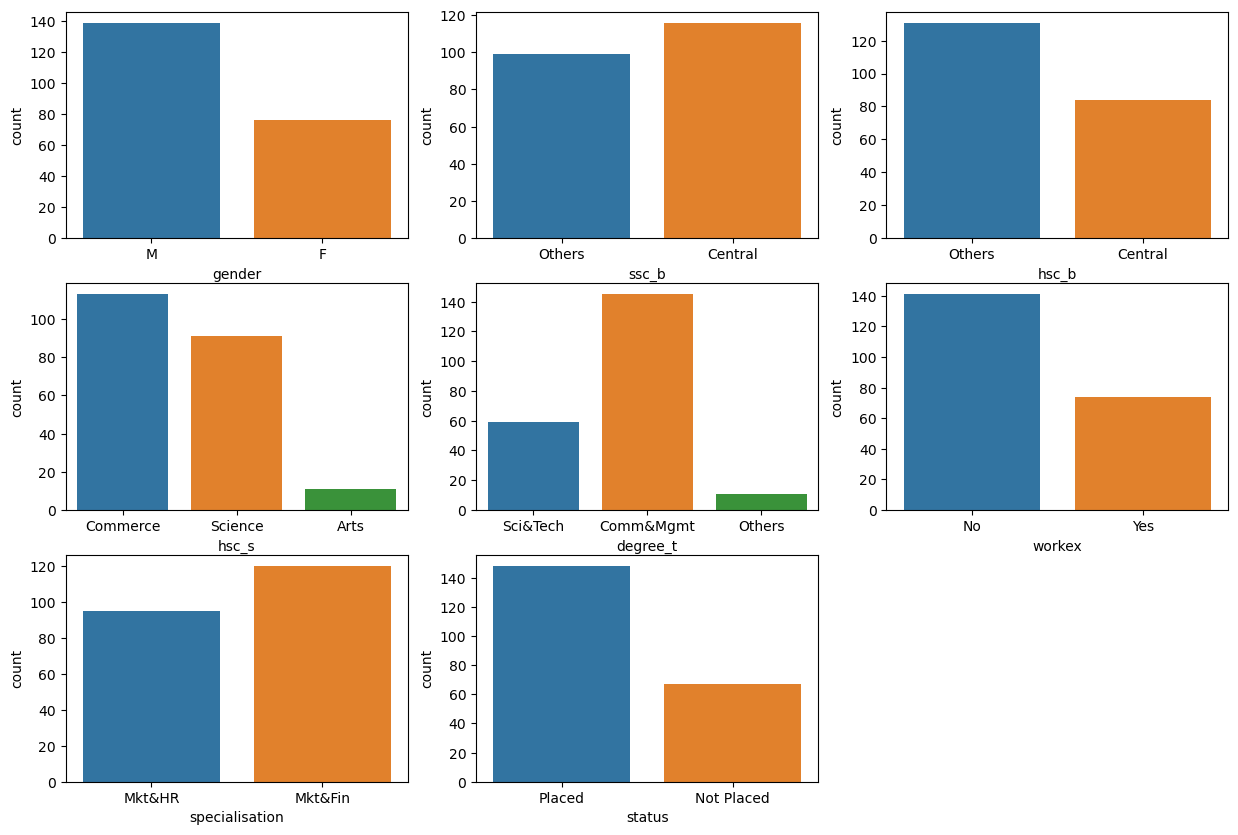

In [11]:
# Plot Categorical data
categorical_data = data[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']]

plt.figure(figsize=(15,10))
plotnumber=1

for column in categorical_data:
    if plotnumber<=14:
        plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[column],data=data)
    plotnumber+=1
plt.show()

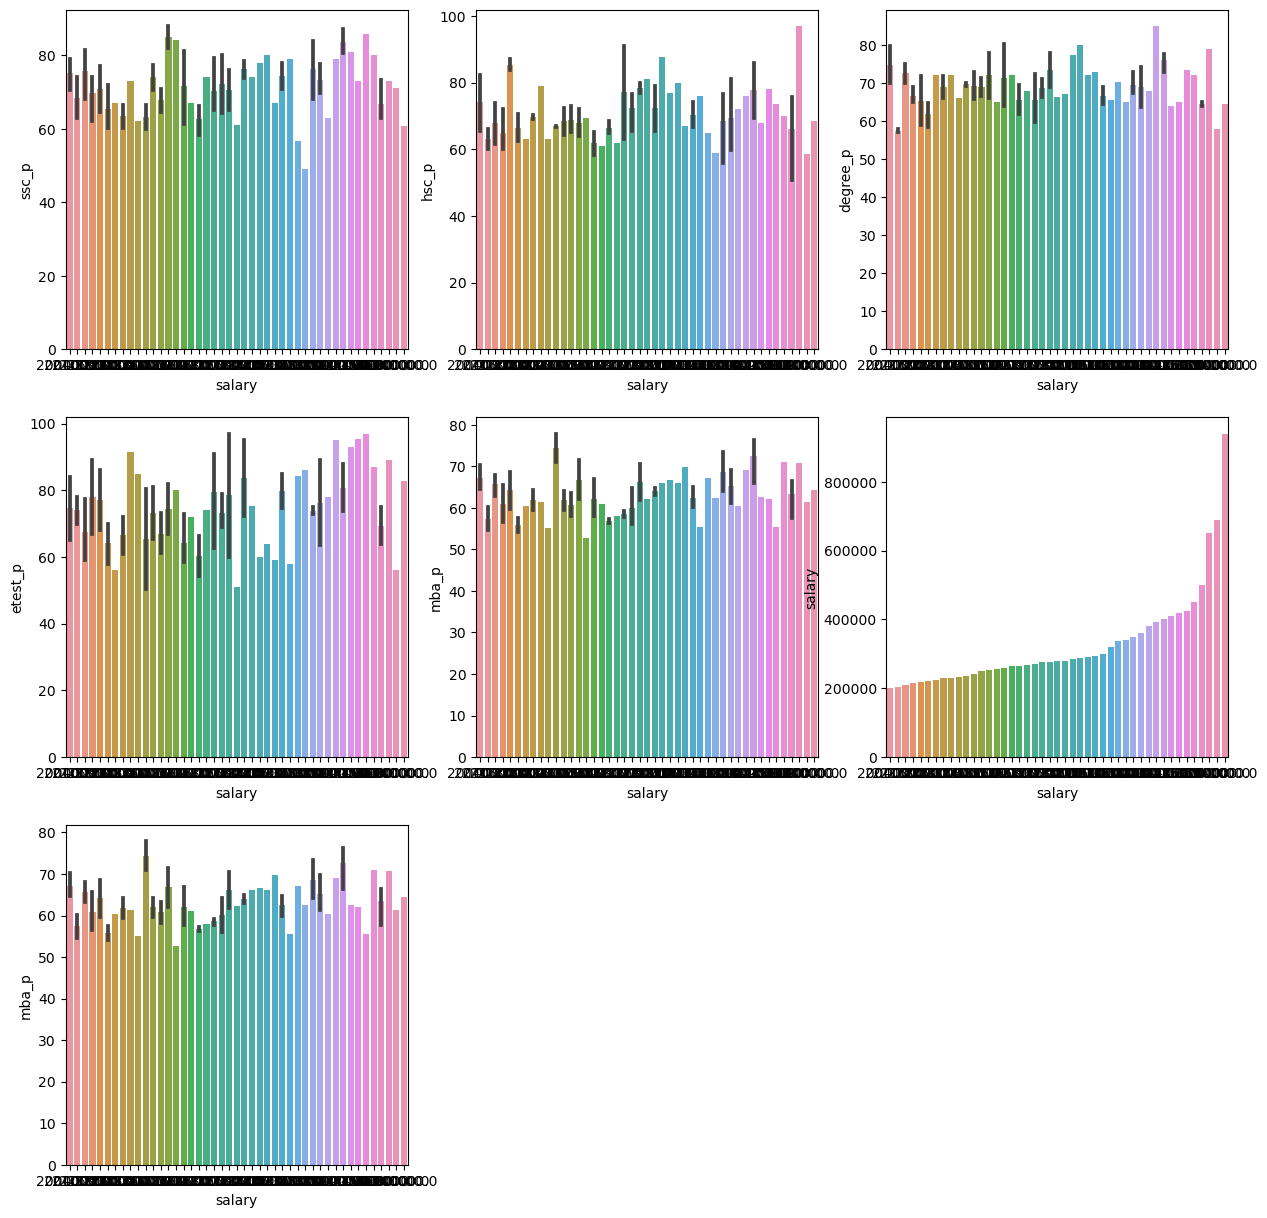

In [12]:
# Numerical plot
numerical_data = data[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p', 'salary','mba_p']]

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in numerical_data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.barplot(x='salary',y=data[column],data=data)
        plotno+=1 ## counter increment
# show plot
plt.show()

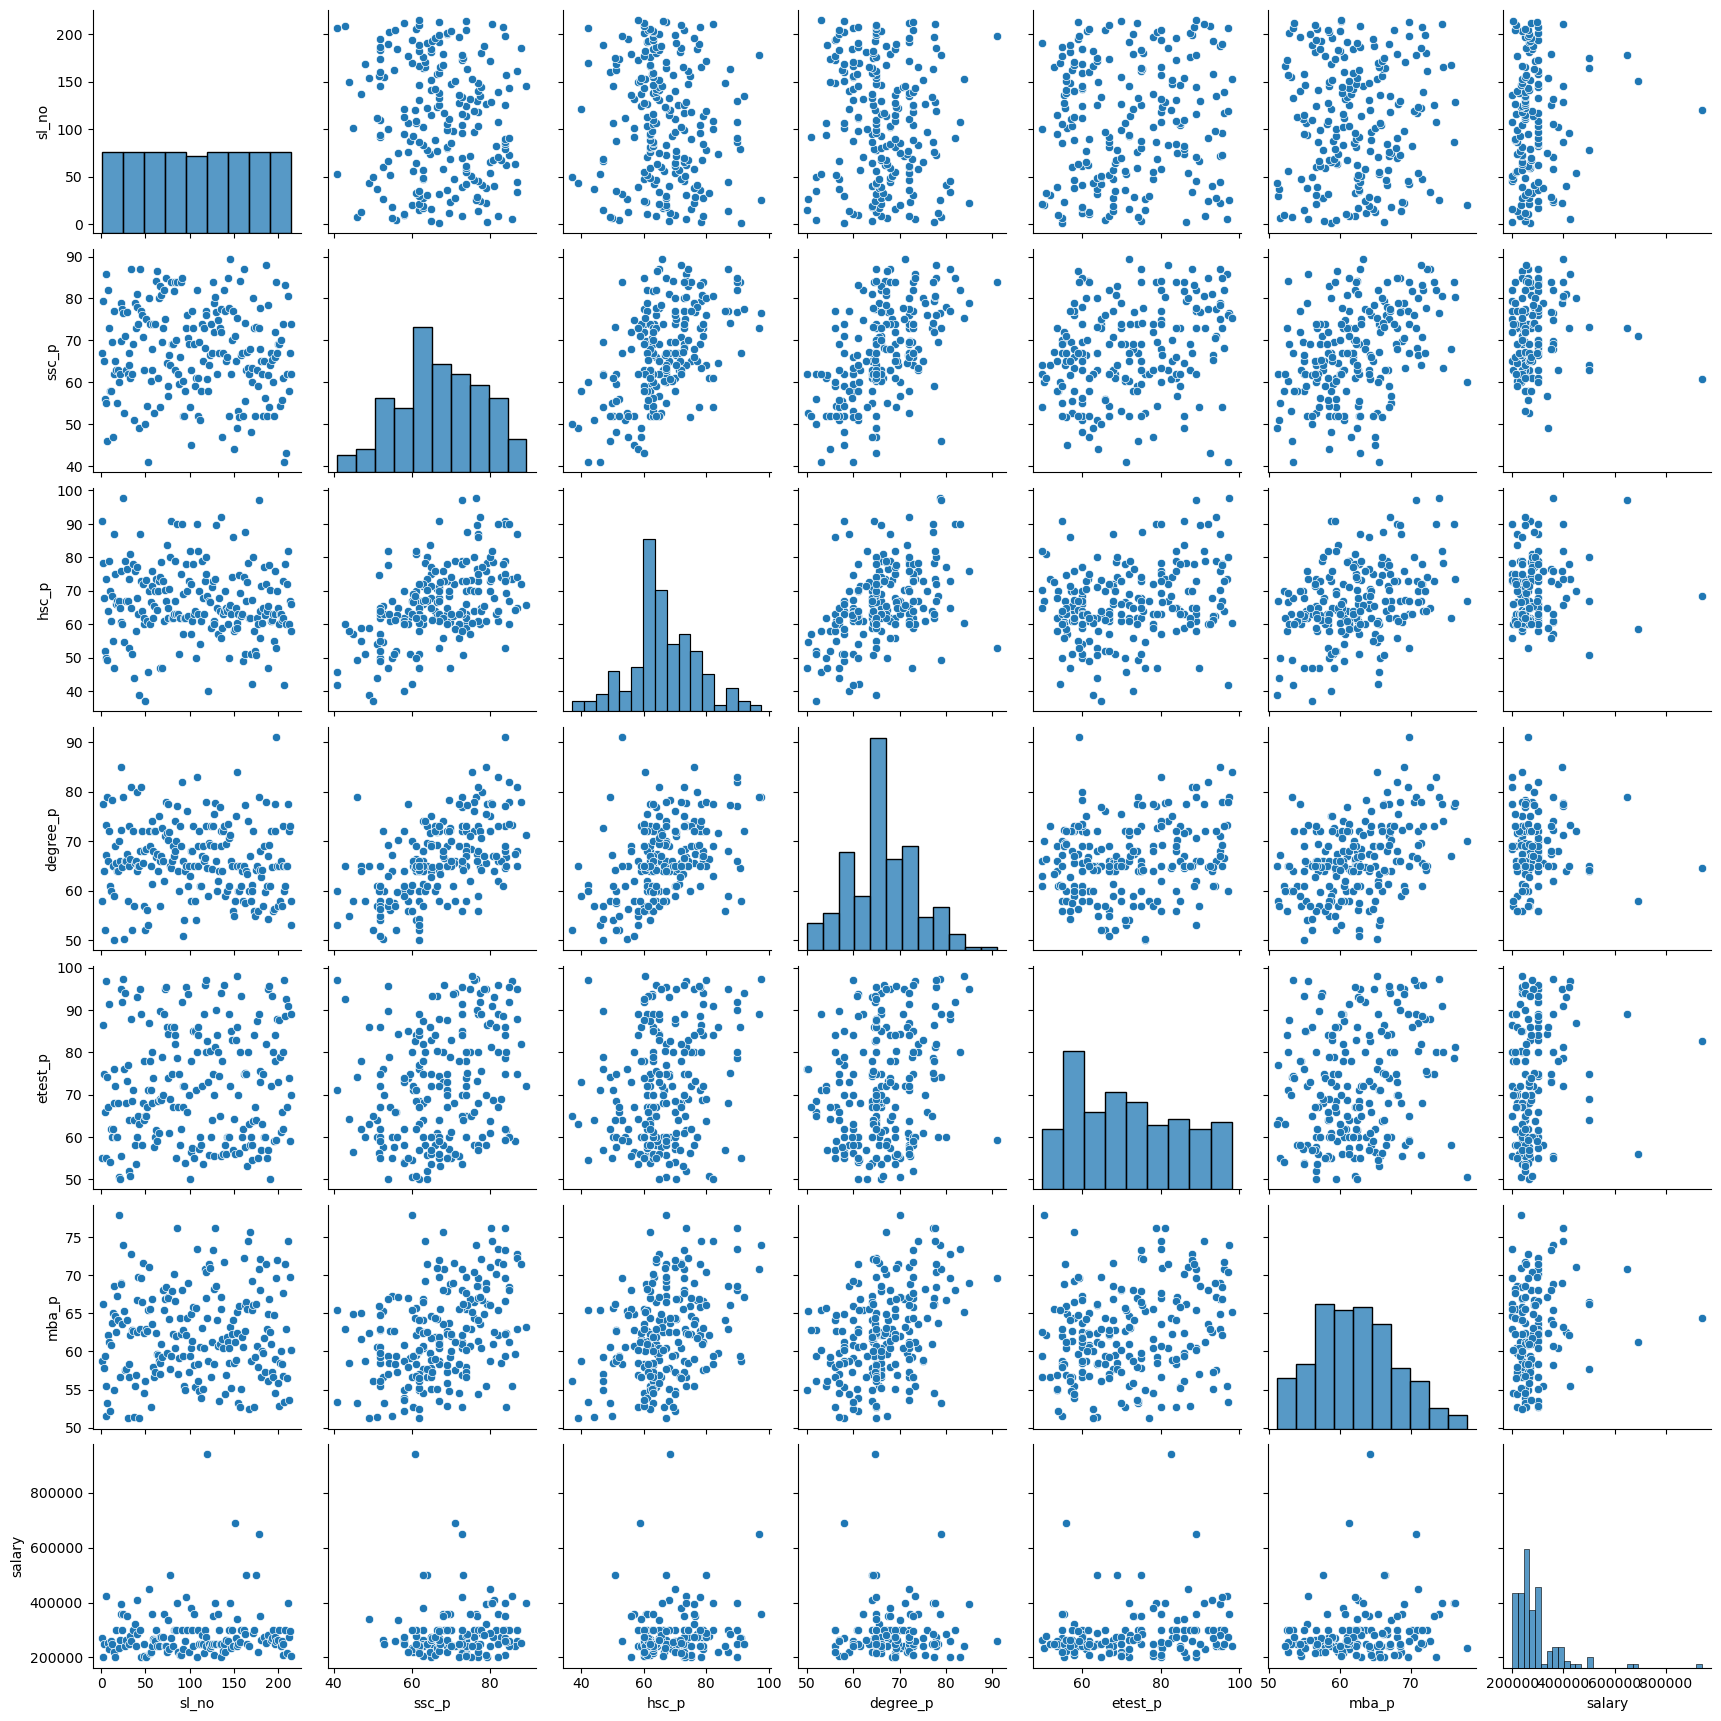

In [13]:
# Multivariate Analysis
sns.pairplot(data)

In [14]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

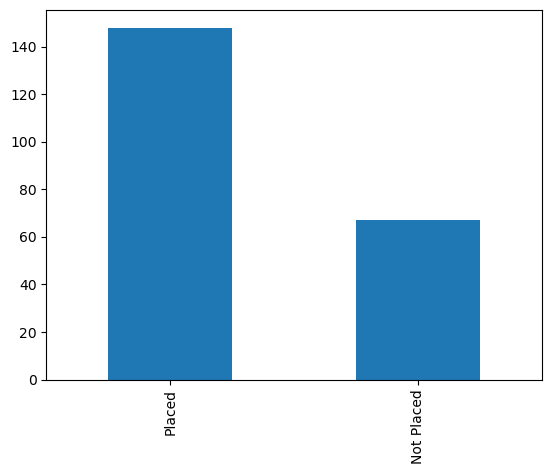

In [15]:
data.status.value_counts().plot(kind='bar')
plt.show()

## Data Preprocessing

In [16]:
# Check missing values
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

* Salary have missing values.

In [17]:
# fill null value in 'salary' column with median
data['salary'] = data['salary'].fillna(data['salary'].median())

In [18]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [19]:
data = data.drop('sl_no',axis=1)

In [20]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [22]:
data['gender']=data['gender'].map({'M':1,'F':0})

In [23]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [24]:
data['ssc_b']=data['ssc_b'].map({'Central':1,'Others':0})

In [25]:
data.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [26]:
data['hsc_b']=data['hsc_b'].map({'Central':1,'Others':0})

In [27]:
data.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [28]:
data['hsc_s']=data['hsc_s'].map({'Commerce':2,'Science':1,'Arts':0})

In [29]:
data.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [30]:
data['degree_t']=data['degree_t'].map({'Comm&Mgmt':2,'Sci&Tech':1,'Others':0})

In [31]:
data.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [32]:
data['workex']=data['workex'].map({'No':1,'Yes':0})

In [33]:
data.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [34]:
data['specialisation']=data['specialisation'].map({'Mkt&Fin':1,'Mkt&HR':0})

In [35]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [36]:
data['status']=data['status'].map({'Placed':1,'Not Placed':0})

In [37]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,0,91.00,0,2,58.00,1,1,55.0,0,58.80,1,270000.0
1,1,79.33,1,78.33,0,1,77.48,1,0,86.5,1,66.28,1,200000.0
2,1,65.00,1,68.00,1,0,64.00,2,1,75.0,1,57.80,1,250000.0
3,1,56.00,1,52.00,1,1,52.00,1,1,66.0,0,59.43,0,265000.0
4,1,85.80,1,73.60,1,2,73.30,2,1,96.8,1,55.50,1,425000.0


## Feature Selection

In [38]:
# Check redundent
data.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.539535,66.333163,0.390698,1.474419,66.370186,1.623256,0.655814,72.100558,0.558140,62.278186,0.688372,281283.720930
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.581987,0.476211,13.275956,0.497767,5.833385,0.464240,78232.510303
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,1.000000,0.000000,60.000000,0.000000,57.945000,0.000000,250000.000000
50%,1.000000,67.000000,1.000000,65.000000,0.000000,2.000000,66.000000,2.000000,1.000000,71.000000,1.000000,62.000000,1.000000,265000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


<AxesSubplot:>

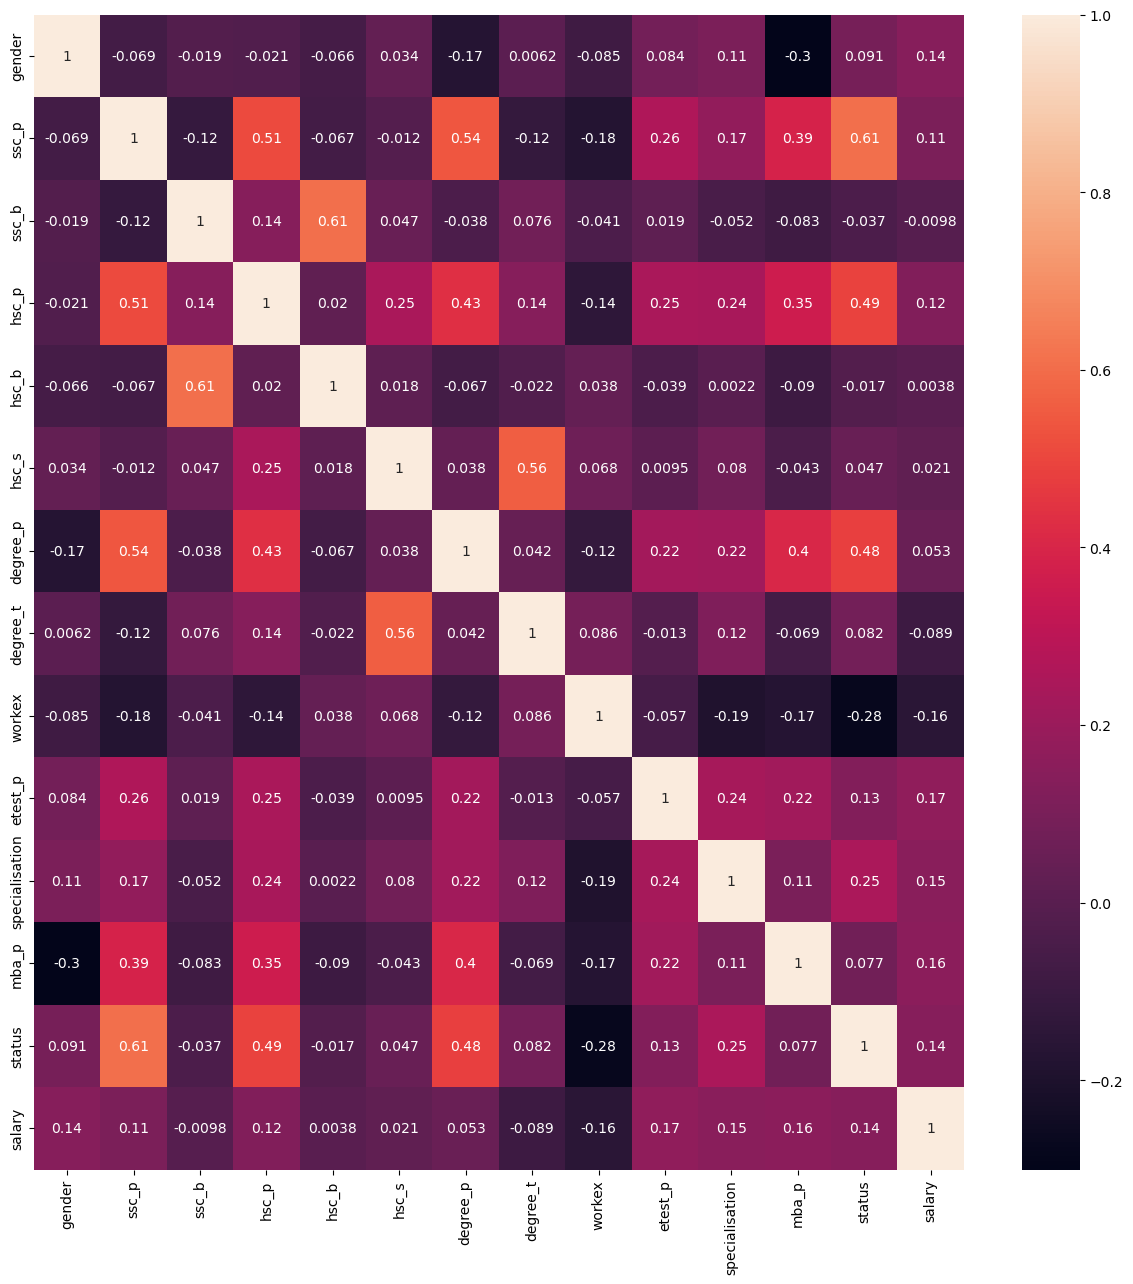

In [39]:
# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

## Model Building

In [40]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [41]:
# Defining x & y
x = data.drop('status',axis=1)
y = data.status

In [42]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [43]:
print('x train shape :',x_train.shape)
print('x test shape',x_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

x train shape : (172, 13)
x test shape (43, 13)
y train shape (172,)
y test shape (43,)


#### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
y_lr_pred = lr.predict(x_test).round()
print(y_lr_pred)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]


In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
print(accuracy_score(y_test,y_lr_pred))

0.8837209302325582


In [48]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.91      0.94      0.93        33

    accuracy                           0.88        43
   macro avg       0.84      0.82      0.83        43
weighted avg       0.88      0.88      0.88        43



### Support vector classifier

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [50]:
y_svc_pred = svc.predict(x_test)

In [51]:
print(accuracy_score(y_test,y_svc_pred))

0.7674418604651163


In [52]:
print(classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.77      1.00      0.87        33

    accuracy                           0.77        43
   macro avg       0.38      0.50      0.43        43
weighted avg       0.59      0.77      0.67        43



#### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_knn_pred = knn.predict(x_test)

In [55]:
print(accuracy_score(y_test,y_knn_pred))

0.9767441860465116


In [56]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        33

    accuracy                           0.98        43
   macro avg       0.95      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



#### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_dt_pred = dt.predict(x_test)

In [59]:
print(accuracy_score(y_test,y_dt_pred))

1.0


In [60]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



#### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_rf_pred = rf.predict(x_test)

In [63]:
print(accuracy_score(y_test,y_rf_pred))

0.9534883720930233


In [64]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



#### Bagging Classifier

In [65]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [66]:
y_bc_pred = bc.predict(x_test)

In [67]:
print(accuracy_score(y_test,y_bc_pred))

0.9534883720930233


In [68]:
print(classification_report(y_test,y_bc_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [69]:
data = [{'Model': 'Logestic Regression', 'Accuracy Score': accuracy_score(y_test,y_lr_pred)},
         {'Model': 'Support Vector Machine', 'Accuracy Score': accuracy_score(y_test,y_svc_pred)},
         {'Model': 'Kneighbors classifier', 'Accuracy Score': accuracy_score(y_test,y_knn_pred)},
         {'Model': 'Decision Tree', 'Accuracy Score': accuracy_score(y_test,y_dt_pred)},
         {'Model': 'Random Forest','Accuracy Score': accuracy_score(y_test,y_rf_pred)},
         {'Model': 'XGBoosting', 'Accuracy Score': accuracy_score(y_test,y_bc_pred)}]
  
df = pd.DataFrame.from_dict(data)
  
df

,Model,Accuracy Score
0,Logestic Regression,0.883721
1,Support Vector Machine,0.767442
2,Kneighbors classifier,0.976744
3,Decision Tree,1.000000
4,Random Forest,0.953488
5,XGBoosting,0.953488
